In [ ]:
!pip install --upgrade pip
!pip install torch-lr-finder
!pip install grad-cam
!pip install torchmetrics
!pip install lightning
!pip install albumentations
!pip install torchsummary

In [1]:
import torch
import visualize
from resnet import ResNet18
from utils import get_summary, get_misclassified_data
from datamodule import CIFAR10DataModule
from pytorch_lightning import Trainer

/opt/conda/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
batch_size = 512 if cuda else 64
device = 'cuda' if cuda else 'cpu'

CUDA Available? False


In [4]:
data_module = CIFAR10DataModule(data_dir="../data", batch_size=batch_size)
data_module.prepare_data()
data_module.setup(stage="fit")
train_loader = data_module.train_dataloader()

Files already downloaded and verified
Files already downloaded and verified


/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py:56: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

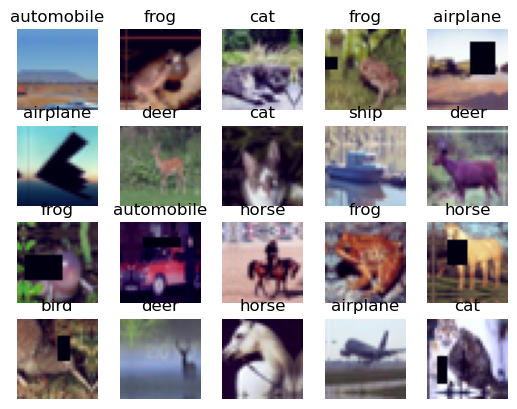

In [5]:
visualize.plot_samples(train_loader, number_of_images=20)

In [6]:
get_summary(ResNet18(loss='cross_entropy', learning_rate=0.03, momentum=0.9, optimizer="SGD", epochs=1), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


Files already downloaded and verified
Files already downloaded and verified


/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py:56: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(
 83%|████████▎ | 83/100 [04:38<00:56,  3.35s/it]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.75E-01


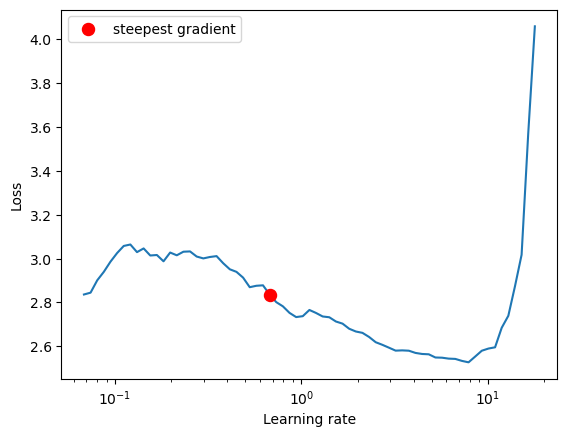


  | Name     | Type               | Params
------------------------------------------------
0 | conv1    | Conv2d             | 1.7 K 
1 | bn1      | BatchNorm2d        | 128   
2 | layer1   | Sequential         | 147 K 
3 | layer2   | Sequential         | 525 K 
4 | layer3   | Sequential         | 2.1 M 
5 | layer4   | Sequential         | 8.4 M 
6 | linear   | Linear             | 5.1 K 
7 | accuracy | MulticlassAccuracy | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 704/704 [37:37<00:00,  0.31it/s, v_num=3]        
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 704/704 [38:51<00:00,  0.30it/s, v_num=3, val_loss=2.310, val_acc=0.108]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 704/704 [38:52<00:00,  0.30it/s, v_num=3, val_loss=2.310, val_acc=0.108]


In [7]:
model = ResNet18(loss='cross_entropy', learning_rate=0.03, momentum=0.9, optimizer="SGD", epochs=1)
trainer = Trainer(
    accelerator = device,
    max_epochs = 1
)
trainer.fit(model, datamodule=data_module)

In [8]:
trainer.test(datamodule=data_module)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


Files already downloaded and verified
Files already downloaded and verified


Restoring states from the checkpoint path at /root/lightning_logs/version_3/checkpoints/epoch=0-step=704.ckpt
Loaded model weights from the checkpoint at /root/lightning_logs/version_3/checkpoints/epoch=0-step=704.ckpt


Testing DataLoader 0: 100%|██████████| 157/157 [02:22<00:00,  1.10it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.1031000018119812     │
│         val_loss          │     2.306394100189209     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 2.306394100189209, 'val_acc': 0.1031000018119812}]

In [9]:
data_module.setup(stage="test")
test_loader = data_module.test_dataloader()

In [10]:
# Get the misclassified data from test dataset
misclassified_data = get_misclassified_data(model, device, test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

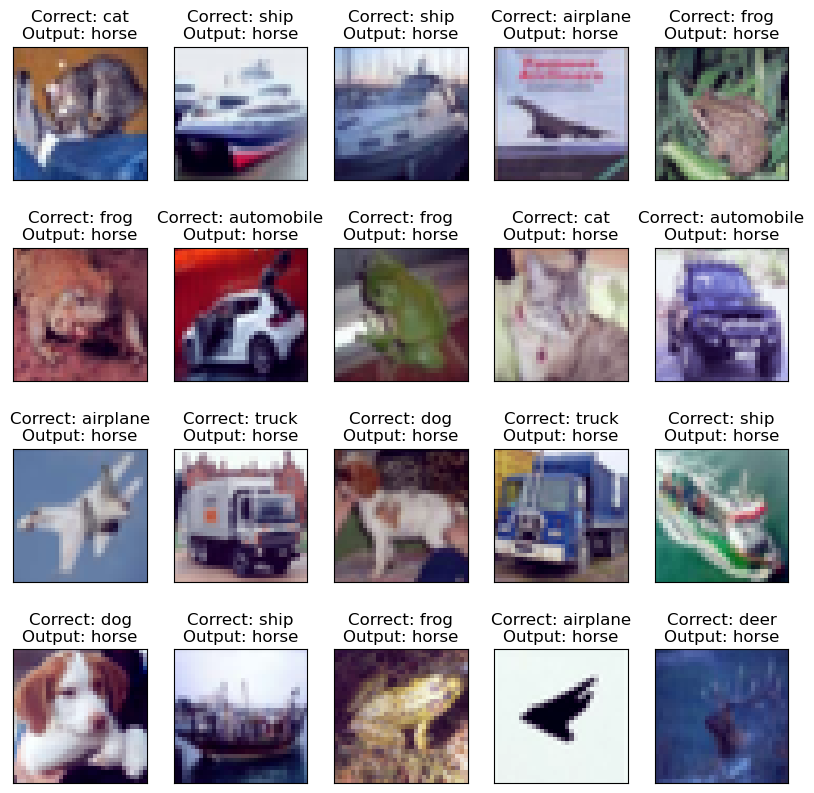

In [11]:
# Plot the misclassified data
visualize.display_cifar_misclassified_data(misclassified_data, number_of_samples=20)

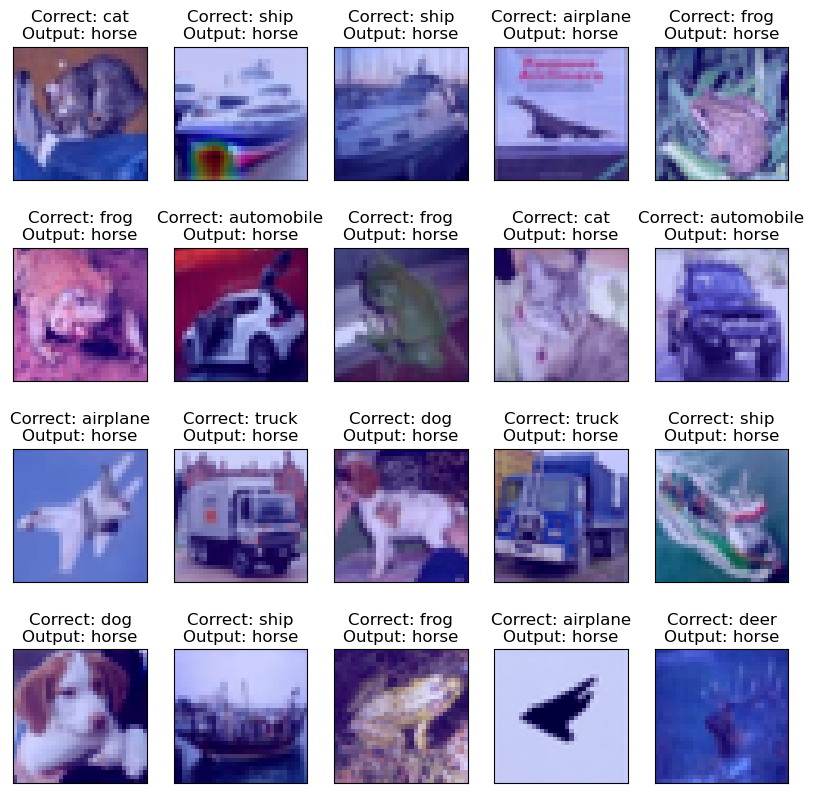

In [12]:
target_layers = [model.layer3[-1]]
targets = None
visualize.display_gradcam_output(misclassified_data, model, target_layers, targets, number_of_samples=20, transparency=0.70)